In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
filename = '/content/drive/MyDrive/sw_single_project/bee_data.csv'
img_path = '/content/drive/MyDrive/sw_single_project/bee_imgs'

In [ ]:
# 데이터 분석

In [ ]:
# 상위 데이터 확인
data = pd.read_csv(filename)
data.head()

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


In [ ]:
df = pd.DataFrame(data)

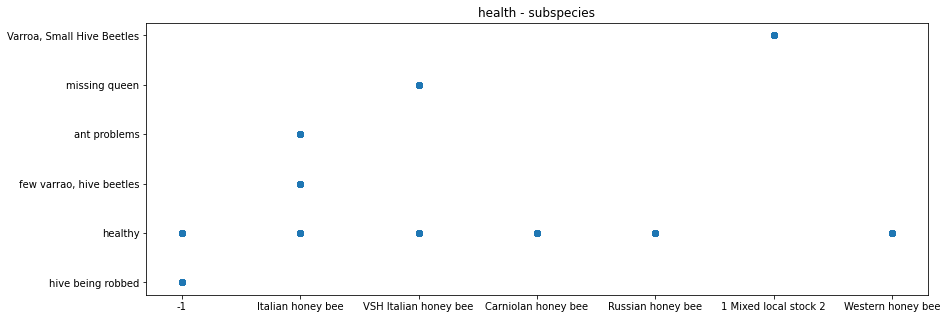

In [ ]:
# 꿀벌 종류 별 건강
health = df['health']
subspecies = df['subspecies']

plt.figure(figsize=(14, 5))
plt.title("health - subspecies")
plt.scatter(subspecies, health)

plt.show()


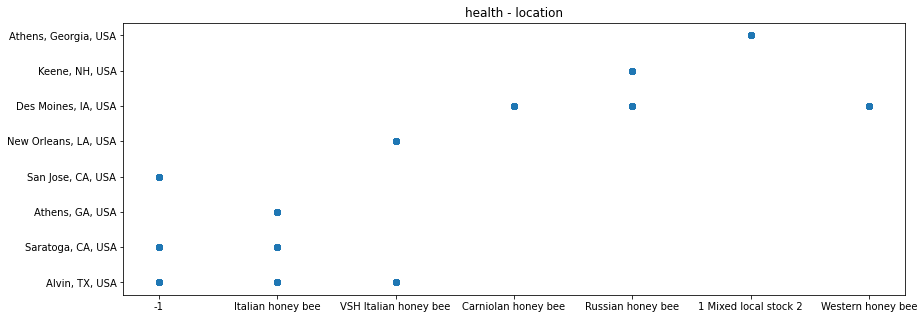

In [ ]:
# 지역 별 꿀벌의 종류
location = df['location']
plt.figure(figsize=(14, 5))
plt.title("health - location")
plt.scatter(subspecies, location)

plt.show()

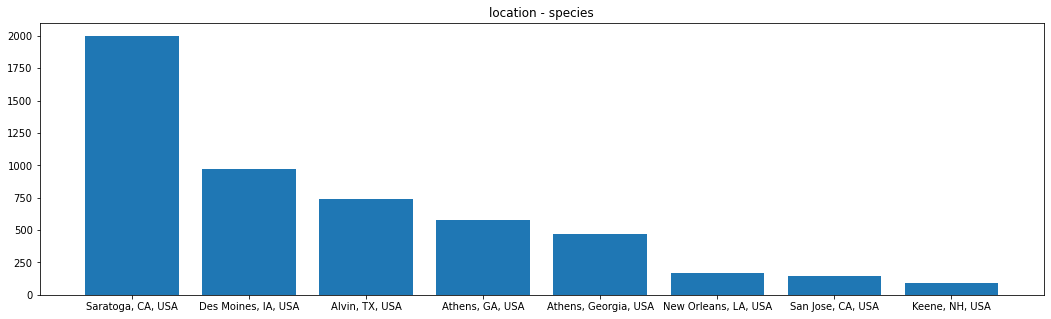

In [ ]:
## 지역 당 꿀벌의 수(종류 무관)
location_cnt = location.value_counts()
plt.figure(figsize=(18, 5))
plt.bar(location_cnt.index, location_cnt.values)
plt.title("location - species")
plt.show()

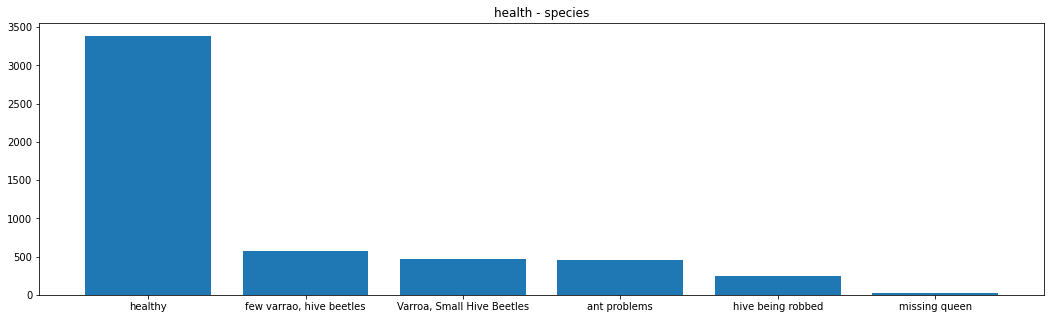

In [ ]:
# 모든 꿀벌의 상태당 개체 수
health_cnt = health.value_counts()
plt.figure(figsize=(18, 5))
plt.bar(health_cnt.index, health_cnt.values)
plt.title("health - species")
plt.show()

In [ ]:
# 이미지 분류

In [ ]:
from PIL import Image

In [ ]:
cd /content/drive/MyDrive/sw_single_project/bee_imgs

/content/drive/MyDrive/sw_single_project/bee_imgs


In [ ]:
X_pics = [Image.open(img_name).convert("RGB") for img_name in df["file"]]

In [ ]:
#이미지를 배열로 변환
X = [ cv2.resize(np.array(i),(100,100)) for i in X_pics]

In [ ]:
# minmax 스케일링(정규화)
X = [i/255.0 for i in X]
X

In [ ]:
X = np.array(X)

In [ ]:
target_health = list(set(health))
target_species = list(set(subspecies))
print(target_health)
print(target_species)

['few varrao, hive beetles', 'ant problems', 'Varroa, Small Hive Beetles', 'hive being robbed', 'healthy', 'missing queen']
['Russian honey bee', 'VSH Italian honey bee', 'Italian honey bee', '1 Mixed local stock 2', 'Carniolan honey bee', 'Western honey bee', '-1']


In [ ]:
# 원 핫 인코딩
y_keys = {"healthy":np.array([1,0,0,0,0,0]),
         "few varrao, hive beetles":np.array([0,1,0,0,0,0]),
         "Varroa, Small Hive Beetles":np.array([0,0,1,0,0,0]),
         "ant problems":np.array([0,0,0,1,0,0]),
         "hive being robbed":np.array([0,0,0,0,1,0]),
         "missing queen":np.array([0,0,0,0,0,1])}

# 모든 꿀벌 건강상태의 원핫인코딩 설정        
y = [y_keys[i] for i in df.health]
y = np.array(y)
y

In [ ]:
#Keras CNN
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras import optimizers
from sklearn.model_selection import train_test_split

In [ ]:
# 꿀벌 건강에 대한 학습
def train():

    model = Sequential()

    # convolution
    model.add(Convolution2D(10,3,3, input_shape=(100,100,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),padding="SAME"))
    
    # convolution
    model.add(Convolution2D(20,3,3, activation="relu"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),padding="SAME"))

    model.add(Flatten())

    # NN
    model.add(Dense(100, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation="softmax"))
    
    model.compile(optimizer="Adam", loss="categorical_crossentropy",metrics=["accuracy"])

    return model

In [ ]:
# 원본데이터로 train, test를 분류하고  train데이터로 train, validation을 분류함

# train - 학습데이터(검증데이터 포함)  test- 테스트데이터
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

# train - 최종 학습데이터, val - 검증데이터
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
len(X_train)

3309

In [ ]:
len(X_test)

1035

In [ ]:
len(X_val)

828

In [ ]:
model = train()
history1 = model.fit(X_train,y_train,verbose=True,validation_data=(X_val, y_val),epochs=30)

Epoch 1/30
104/104 [==============================] - 4s 26ms/step - loss: 1.1674 - accuracy: 0.6564 - val_loss: 1.0366 - val_accuracy: 0.6606
Epoch 2/30
104/104 [==============================] - 2s 24ms/step - loss: 0.9672 - accuracy: 0.6624 - val_loss: 0.8172 - val_accuracy: 0.6944
Epoch 3/30
104/104 [==============================] - 2s 24ms/step - loss: 0.7093 - accuracy: 0.7274 - val_loss: 0.6163 - val_accuracy: 0.7560
Epoch 4/30
104/104 [==============================] - 2s 24ms/step - loss: 0.5685 - accuracy: 0.7743 - val_loss: 0.5087 - val_accuracy: 0.7814
Epoch 5/30
104/104 [==============================] - 2s 24ms/step - loss: 0.4811 - accuracy: 0.8084 - val_loss: 0.5277 - val_accuracy: 0.7899
Epoch 6/30
104/104 [==============================] - 2s 24ms/step - loss: 0.4392 - accuracy: 0.8244 - val_loss: 0.4212 - val_accuracy: 0.8285
Epoch 7/30
104/104 [==============================] - 2s 24ms/step - loss: 0.4058 - accuracy: 0.8344 - val_loss: 0.4074 - val_accuracy: 0.8321

33/33 [==============================] - 0s 10ms/step - loss: 0.2165 - accuracy: 0.9111


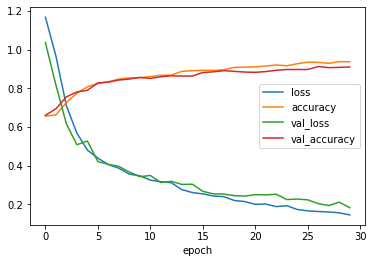

In [ ]:
# 꿀벌 건강 상태 학습에 대한 loss와 acc(정확성)
locc,acc = model.evaluate(X_test,y_test)

plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')

plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
predict = model.predict(X_test)

33/33 [==============================] - 0s 10ms/step


In [ ]:
# 꿀벌 건강 상태 예측
predict_list = []
for i in predict:
  idx = max(i)
  predict_list.append(list(i).index(idx))

for index, i in enumerate(predict_list):
  print(f'X_test {index+1} 번째 이미지의 예측은 {target_health[i]}입니다. 예측확률은 {max(predict[index])*100:.2f}%입니다.')

X_test 1 번째 이미지의 예측은 hive being robbed입니다. 예측확률은 65.69%입니다.
X_test 2 번째 이미지의 예측은 hive being robbed입니다. 예측확률은 99.81%입니다.
X_test 3 번째 이미지의 예측은 hive being robbed입니다. 예측확률은 99.70%입니다.
X_test 4 번째 이미지의 예측은 ant problems입니다. 예측확률은 99.99%입니다.
X_test 5 번째 이미지의 예측은 Varroa, Small Hive Beetles입니다. 예측확률은 59.18%입니다.
X_test 6 번째 이미지의 예측은 hive being robbed입니다. 예측확률은 99.82%입니다.
X_test 7 번째 이미지의 예측은 hive being robbed입니다. 예측확률은 100.00%입니다.
X_test 8 번째 이미지의 예측은 hive being robbed입니다. 예측확률은 99.91%입니다.
X_test 9 번째 이미지의 예측은 hive being robbed입니다. 예측확률은 99.51%입니다.
X_test 10 번째 이미지의 예측은 missing queen입니다. 예측확률은 95.74%입니다.
X_test 11 번째 이미지의 예측은 healthy입니다. 예측확률은 66.24%입니다.
X_test 12 번째 이미지의 예측은 missing queen입니다. 예측확률은 99.35%입니다.
X_test 13 번째 이미지의 예측은 hive being robbed입니다. 예측확률은 99.99%입니다.
X_test 14 번째 이미지의 예측은 Varroa, Small Hive Beetles입니다. 예측확률은 67.94%입니다.
X_test 15 번째 이미지의 예측은 healthy입니다. 예측확률은 88.70%입니다.
X_test 16 번째 이미지의 예측은 ant problems입니다. 예측확률은 87.72%입니다.
X_test 17 번째 이미지의 예측은 Varroa, Small Hive Beetles입니다.

In [ ]:
# 꿀벌 종 분류

In [ ]:
# 원 핫 인코딩
y_sp_keys = {"Italian honey bee":np.array([1,0,0,0,0,0,0]),
         "Russian honey bee":np.array([0,1,0,0,0,0,0]),
         "Carniolan honey bee":np.array([0,0,1,0,0,0,0]),
         "1 Mixed local stock 2":np.array([0,0,0,1,0,0,0]),
         "VSH Italian honey bee":np.array([0,0,0,0,1,0,0]),
        "Western honey bee":np.array([0,0,0,0,0,1,0]),
         "-1":np.array([0,0,0,0,0,0,1])}

# 모든 꿀벌 종의 원핫인코딩 설정        
y_sp = [y_sp_keys[i] for i in df.subspecies]
y_sp = np.array(y_sp)
y_sp

In [ ]:
# 꿀벌 종에 대한 학습
def train2():
    model = Sequential()
    # convolution
    model.add(Convolution2D(10,3,3, input_shape=(100,100,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),padding="SAME"))
    
    # convolution
    model.add(Convolution2D(20,3,3, activation="relu"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2,2),padding="SAME"))

    model.add(Flatten())

    # NN
    model.add(Dense(100, activation="relu"))
    model.add(Dropout(0.2))
    model.add(Dense(7, activation="softmax"))
    
    model.compile(optimizer="Adam", loss="categorical_crossentropy",metrics=["accuracy"])

    return model

In [ ]:
# 원본데이터로 train, test를 분류하고  train데이터로 train, validation을 분류함

# train - 학습데이터(검증데이터 포함)  test- 테스트데이터
X_train, X_test, y_train, y_test = train_test_split(X, y_sp, test_size=0.2, random_state=1)

# train - 최종 학습데이터, val - 검증데이터
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
model2 = train2()
history2 = model2.fit(X_train,y_train, validation_data=(X_val, y_val), verbose=True,shuffle=True,epochs=30)

Epoch 1/30
104/104 [==============================] - 4s 27ms/step - loss: 1.2572 - accuracy: 0.6132 - val_loss: 0.9283 - val_accuracy: 0.6800
Epoch 2/30
104/104 [==============================] - 2s 24ms/step - loss: 0.8594 - accuracy: 0.6806 - val_loss: 0.8974 - val_accuracy: 0.6655
Epoch 3/30
104/104 [==============================] - 2s 24ms/step - loss: 0.7395 - accuracy: 0.7171 - val_loss: 0.6246 - val_accuracy: 0.7826
Epoch 4/30
104/104 [==============================] - 3s 24ms/step - loss: 0.5863 - accuracy: 0.7875 - val_loss: 0.5252 - val_accuracy: 0.7983
Epoch 5/30
104/104 [==============================] - 3s 24ms/step - loss: 0.5227 - accuracy: 0.7900 - val_loss: 0.4470 - val_accuracy: 0.8152
Epoch 6/30
104/104 [==============================] - 3s 24ms/step - loss: 0.4461 - accuracy: 0.8217 - val_loss: 0.4078 - val_accuracy: 0.8394
Epoch 7/30
104/104 [==============================] - 3s 24ms/step - loss: 0.4015 - accuracy: 0.8426 - val_loss: 0.3668 - val_accuracy: 0.8623

33/33 [==============================] - 0s 11ms/step - loss: 0.1738 - accuracy: 0.9198


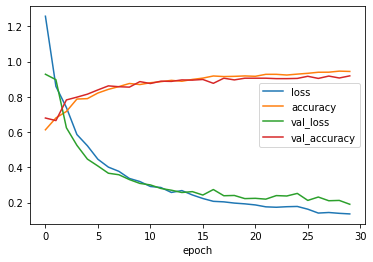

In [ ]:
# 꿀벌 종류 학습에 대한 loss와 acc(정확성)
locc2,acc2 = model2.evaluate(X_test,y_test)

plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
# 꿀벌 종 상태 예측
predict2 = model2.predict(X_test)
predict_list2 = []
for i in predict2:
  idx = max(i)
  predict_list2.append(list(i).index(idx))

for index, i in enumerate(predict_list2):
  print(f'{index+1} 번째 이미지의 예측은 {target_species[i]}입니다. 예측확률은 {max(predict2[index])*100:.2f}%입니다.')

33/33 [==============================] - 0s 11ms/step
1 번째 이미지의 예측은 Russian honey bee입니다. 예측확률은 91.84%입니다.
2 번째 이미지의 예측은 Italian honey bee입니다. 예측확률은 99.99%입니다.
3 번째 이미지의 예측은 Italian honey bee입니다. 예측확률은 99.94%입니다.
4 번째 이미지의 예측은 Russian honey bee입니다. 예측확률은 98.64%입니다.
5 번째 이미지의 예측은 Russian honey bee입니다. 예측확률은 53.54%입니다.
6 번째 이미지의 예측은 Italian honey bee입니다. 예측확률은 96.59%입니다.
7 번째 이미지의 예측은 Russian honey bee입니다. 예측확률은 100.00%입니다.
8 번째 이미지의 예측은 -1입니다. 예측확률은 99.63%입니다.
9 번째 이미지의 예측은 VSH Italian honey bee입니다. 예측확률은 99.91%입니다.
10 번째 이미지의 예측은 -1입니다. 예측확률은 95.82%입니다.
11 번째 이미지의 예측은 Russian honey bee입니다. 예측확률은 50.13%입니다.
12 번째 이미지의 예측은 -1입니다. 예측확률은 99.99%입니다.
13 번째 이미지의 예측은 Russian honey bee입니다. 예측확률은 99.88%입니다.
14 번째 이미지의 예측은 Russian honey bee입니다. 예측확률은 73.90%입니다.
15 번째 이미지의 예측은 1 Mixed local stock 2입니다. 예측확률은 91.59%입니다.
16 번째 이미지의 예측은 Russian honey bee입니다. 예측확률은 91.71%입니다.
17 번째 이미지의 예측은 Russian honey bee입니다. 예측확률은 91.62%입니다.
18 번째 이미지의 예측은 Russian honey bee입니다. 예측확률은 99.64%입니다.
19 번째 이미지의 예측은 1 Mi